In [48]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## KNN Classification

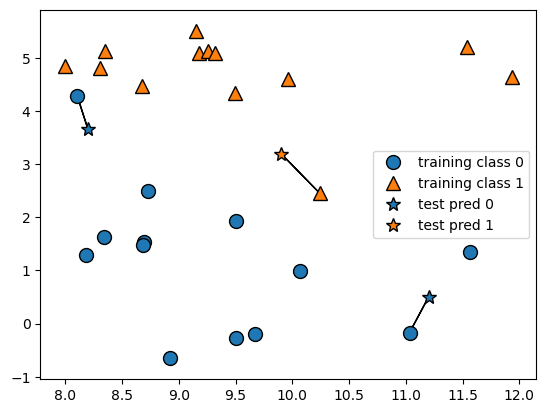

In [49]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

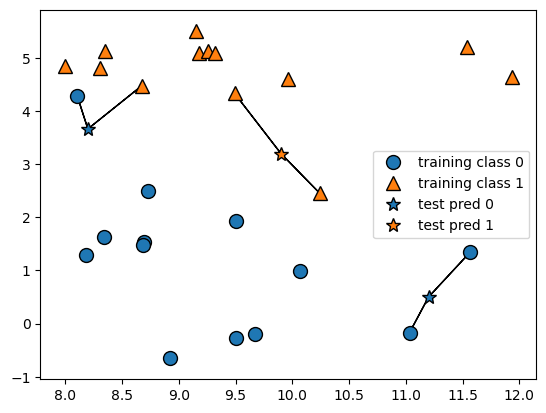

In [50]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

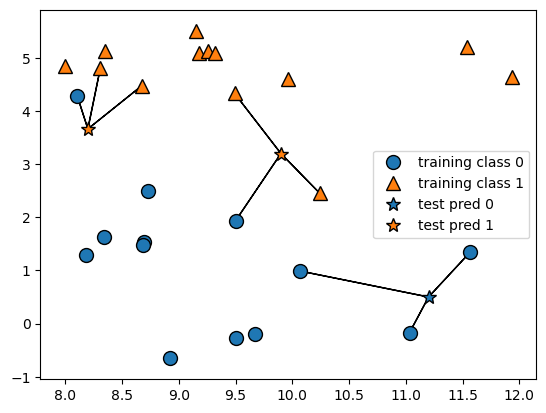

In [51]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

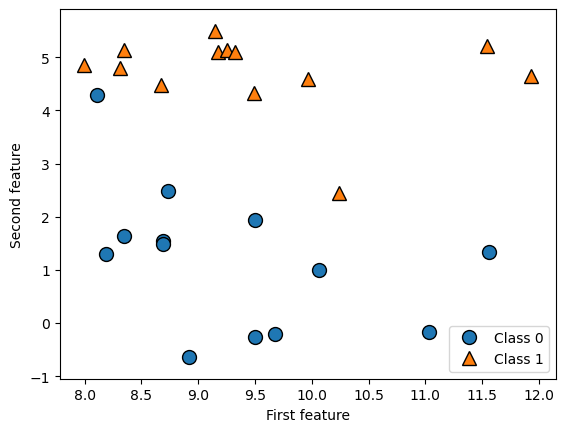

In [62]:
# Example :


X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=0)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

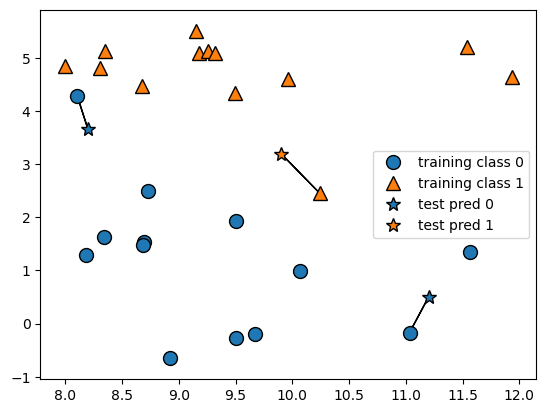

In [63]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

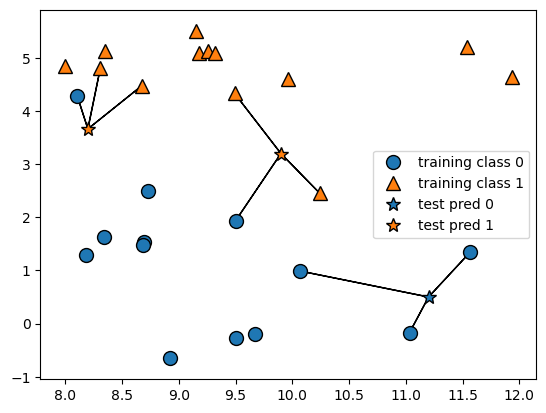

In [64]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [65]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
print("Accuracy: {:.2f}".format(clf.score(X_test, y_test)))


Accuracy: 0.83


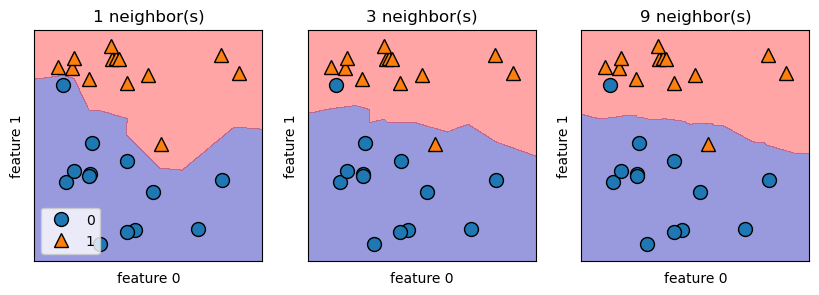

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

 ## KNN Regression

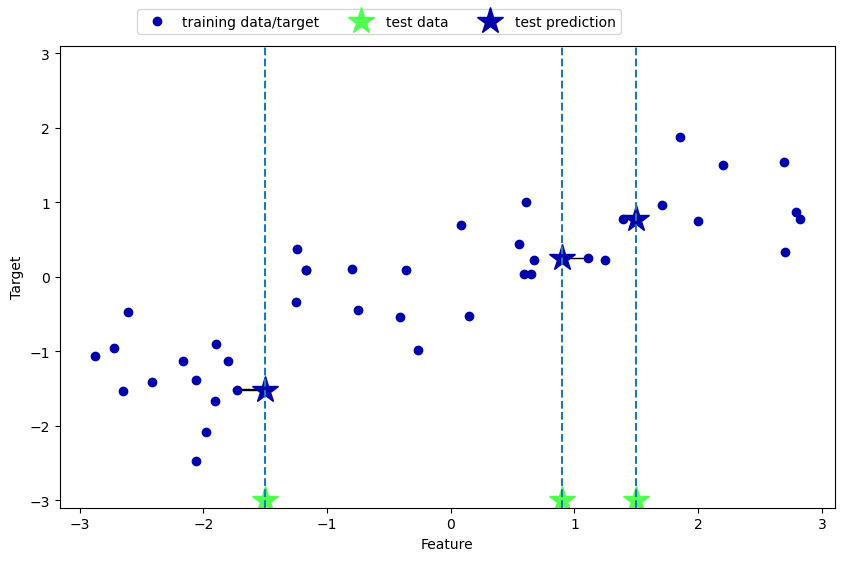

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

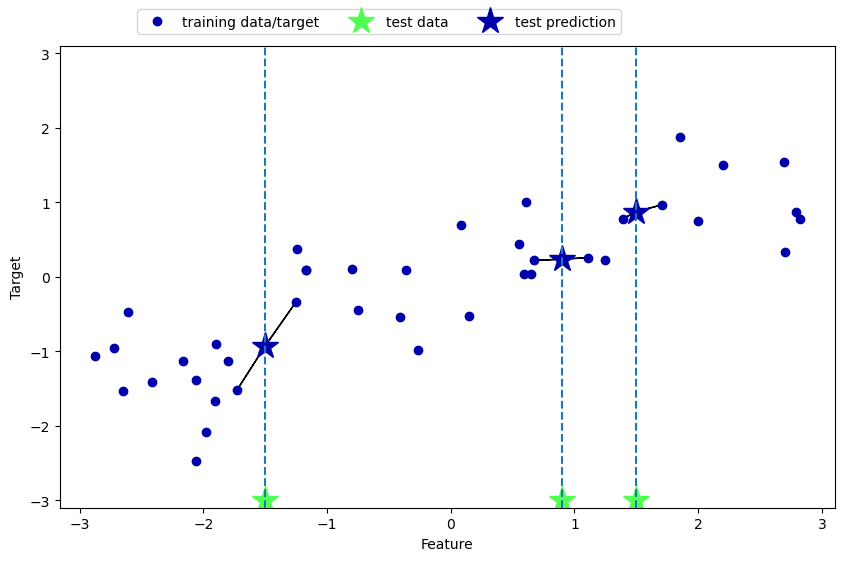

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

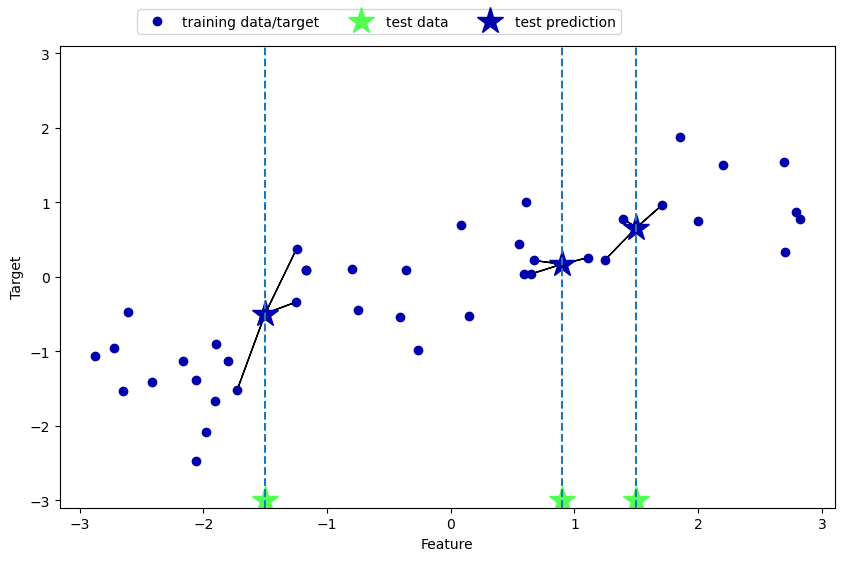

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

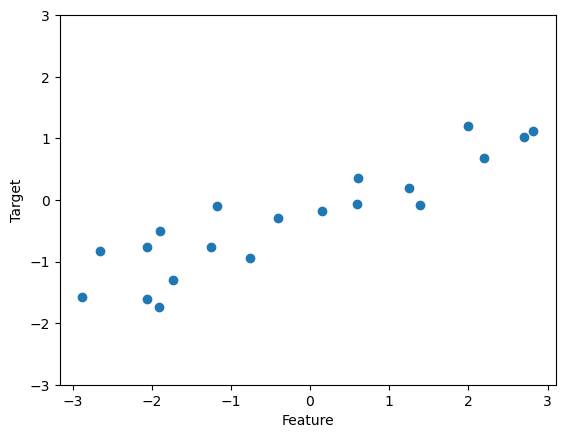

In [70]:
# Example:


X, y = mglearn.datasets.make_wave(n_samples=20)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
print("R2 score: {:.2f}".format(reg.score(X_test, y_test)))

R2 score: 0.92


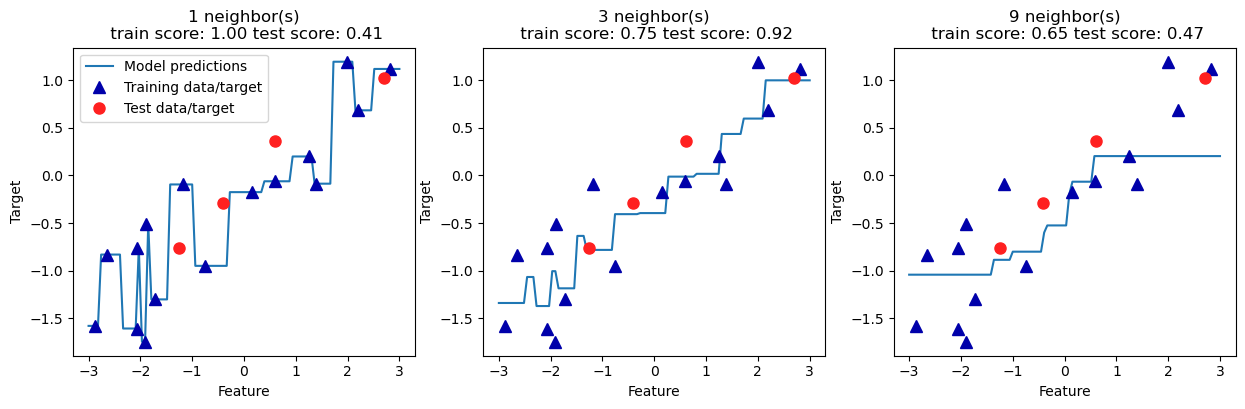

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 100 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 100).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'o', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [71]:
# Real World Example of K-neighbors Classification:

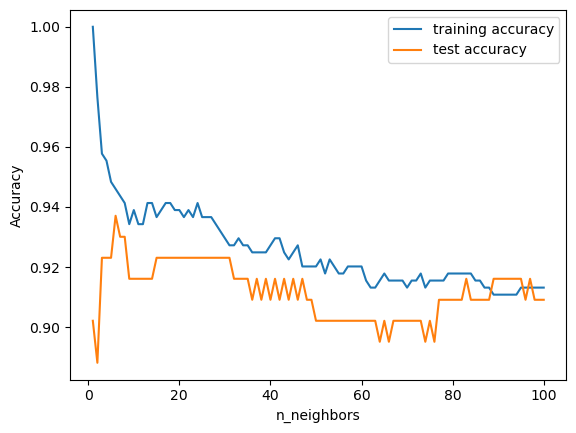

In [82]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 101)

for n_neighbors in neighbors_settings:
    reg = KNeighborsClassifier(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()